In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, recall_score

In [3]:
diabetes_df = pd.read_csv('diabetes.csv')

In [4]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


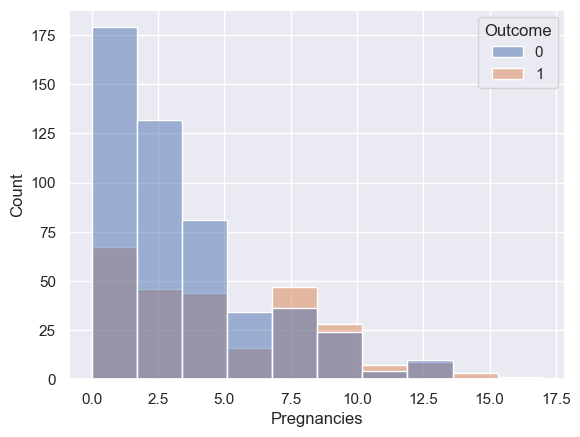

In [20]:
sns.set_style('darkgrid')
sns.histplot(data = diabetes_df, x = 'Pregnancies', bins = 10, hue= 'Outcome');

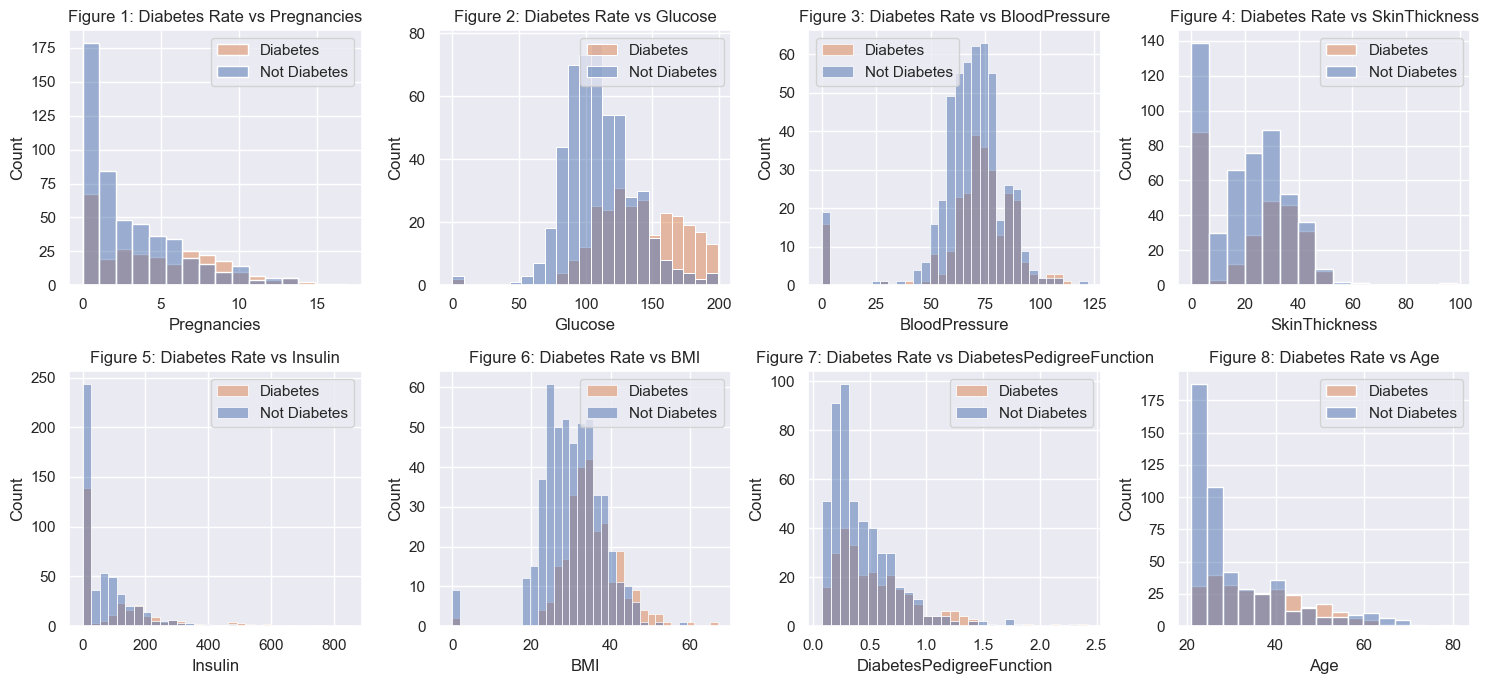

In [36]:
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]
n_rows = 2
n_cols = 4

fig, ax = plt.subplots(n_rows,n_cols, figsize=(15,7))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c
        if i < len(cols):
            ax_i = ax[r,c]
            sns.histplot(data = diabetes_df, x = cols[i], hue = 'Outcome', ax = ax_i )
            ax_i.set_title(f"Figure {i+1}: Diabetes Rate vs {cols[i]}")
            ax_i.legend(title='', labels={'Not Diabetes','Diabetes'})
plt.tight_layout()

In [26]:
diabetes_df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [101]:
X = diabetes_df.iloc[:, :-1]
y = diabetes_df.iloc[:, -1]

In [102]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [103]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [104]:
scale = StandardScaler()
scale.fit(X)

StandardScaler()

In [105]:
Sd_scale = scale.transform(X)

In [106]:
Sd_scale

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [107]:
X = Sd_scale
y = diabetes_df['Outcome']

In [108]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [109]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [110]:
svc_model  = SVC()

In [111]:
svc_model.fit(X_train,y_train)

SVC()

In [112]:
svc_model.score(X_test,y_test)

0.8051948051948052

In [113]:
y_pred = svc_model.predict(X_train)

In [114]:
training_acc = accuracy_score(y_pred, y_train)

In [115]:
print('Accuracy score of training data: ', training_acc)

Accuracy score of training data:  0.8208469055374593


In [116]:
y_test_pred = svc_model.predict(X_test)

In [117]:
test_acc = accuracy_score(y_test_pred, y_test)

In [118]:
print('Accuracy score of test data: ', test_acc)

Accuracy score of test data:  0.8051948051948052


In [133]:
input_data = [4,130,92,0,0,37.6,1.,30]
feature_names =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]
input_df = pd.DataFrame([input_data], columns=feature_names)
#input_data_array = np.array([input_data]).reshape(1, -1)

std_data = scale.transform(input_df)
print(std_data)

prediction = svc_model.predict(std_data)
print("Prediction: ", prediction)

if prediction[0] == 0:
    print('The person is not Diabetes')
else:
    print('The person is Diabetes ')

[[ 0.04601433  0.28497518  1.18359575 -1.28821221 -0.69289057  0.71168975
   1.59499624 -0.27575966]]
Prediction:  [1]
The person is Diabetes 
